# Git Link

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data is splitted in train and test set.
### 2018 data is used for testing purpose and rest of the data is used for Training.

In [2]:
#load training data
data_train = pd.read_csv('IBM_Train.csv')
training_set = data_train.iloc[:,1:2].values

In [3]:
training_set

array([[ 206.710007],
       [ 207.179993],
       [ 206.970001],
       ..., 
       [ 152.509995],
       [ 152.949997],
       [ 153.199997]])

In [4]:
#scale the features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[ 0.91054481],
       [ 0.91539402],
       [ 0.91322737],
       ..., 
       [ 0.35132061],
       [ 0.35586046],
       [ 0.35843991]])

In [5]:
#create the train data
X_train = []
y_train = []
for i in range(60, 1427):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## Import keras Libraries

In [7]:
#import Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
#define NN
regressor = Sequential()

In [9]:
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(Dense(units = 1))

In [14]:
#compile NN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#execute NN
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1367/1367 [==============================] - 9s 7ms/step - loss: 0.0485
Epoch 2/100
1367/1367 [==============================] - 7s 5ms/step - loss: 0.0083
Epoch 3/100
1367/1367 [==============================] - 7s 5ms/step - loss: 0.0071
Epoch 4/100
1367/1367 [==============================] - 7s 5ms/step - loss: 0.0079
Epoch 5/100
1367/1367 [==============================] - 7s 5ms/step - loss: 0.0079
Epoch 6/100
1367/1367 [==============================] - 8s 6ms/step - loss: 0.0065
Epoch 7/100
1367/1367 [==============================] - 7s 5ms/step - loss: 0.0064
Epoch 8/100
1367/1367 [==============================] - 8s 6ms/step - loss: 0.0059
Epoch 9/100
1367/1367 [==============================] - 9s 6ms/step - loss: 0.0053
Epoch 10/100
1367/1367 [==============================] - 8s 6ms/step - loss: 0.0055
Epoch 11/100
1367/1367 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 12/100
1367/1367 [==============================] - 8s 6ms/step - lo

1367/1367 [==============================] - 7s 5ms/step - loss: 0.0014
Epoch 97/100
1367/1367 [==============================] - 7s 5ms/step - loss: 0.0015
Epoch 98/100
1367/1367 [==============================] - 7s 5ms/step - loss: 0.0012
Epoch 99/100
1367/1367 [==============================] - 7s 5ms/step - loss: 0.0012
Epoch 100/100
1367/1367 [==============================] - 7s 5ms/step - loss: 0.0013


In [16]:
data_test = pd.read_csv('IBM_Test.csv')
real_stock_price = data_test.iloc[:, 1:2].values

In [17]:
#load test-data and create test-set
data_total = pd.concat((data_train['Open'],data_test['Open']),axis=0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values

In [18]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,140):
    X_test.append(inputs[i-60:i,0])

In [19]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

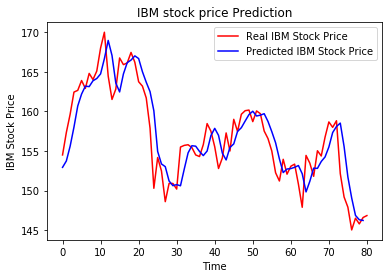

In [20]:
#plot true and predicted values
plt.plot(real_stock_price, color = 'red', label = 'Real IBM Stock Price')
plt.plot(predicted_stock_price,color='blue', label = 'Predicted IBM Stock Price')
plt.title('IBM stock price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()